# Composição do Dataset: Tendências do Petróleo Brent


**Descrição:** Este notebook visa analisar os dados de preço do Petróleo Brent, bem como suas principais variações ao longo do tempo. Este tipo de petróleo bruto é extraído Oceano Atlântico Norte, mais precisamente no Mar do Norte, próximo à Noruega e Dinamarca. Cerca de dois terços de todos os contratos de petróleo bruto no mundo contem este petróleo, tornando-o uma referência em relação a sua precificação, sendo utilizado inclusive pela política de preços da Petrobrás. O estudo irá incluir análise estatística e a aplicação de técnica de Machine Learning com o intuito de prever o preço do petróleo diariamente.

## Importando as bibliotecas necessárias

In [2]:
# Bibliotecas para manipulação dos dados
import numpy as np
import pandas as pd


# Bibliotecas para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Importando a biblioteca ipeadatapy para acessar dados do Instituto de Pesquisa Econômica Aplicada (IPEA)
import ipeadatapy as ip 

# Importando a biblioteca yfinance para acessar dados financeiros do Yahoo Finance
import yfinance as yf 

#Ignorar todos os avisos gerados durante a execução
import warnings
warnings.filterwarnings('ignore')

## Importando os dados

### Preços Petróleo Brent (Dataset principal)

In [3]:
import ipeadatapy as ipea

ipea.list_series() # lista de séries disponíveis

,CODE,NAME
0,ABATE_ABPEAV,Abate - aves - peso das carcaças
1,ABATE_ABQUBV,Abate - bovinos - quantidade
2,ABATE12_ABPEVA12,Abate - vacas - peso das carcaças
3,ABATE12_ABQUBO12,Abate - bois - quantidade
4,ABATE12_ABQUBV12,Abate - bovinos - quantidade
...,...,...
3059,PNADCT_TXPARTCUF_SI,Taxa de participação - sem instrução ou equiva...
3060,PNAD_IAGRV,Domicílios com insegurança alimentar grave
3061,PNAD_IALEV,Domicílios com insegurança alimentar leve
3062,PNAD_IAMOD,Domicílios com insegurança alimentar moderada


## Limpeza e preparação dos dados

In [4]:
# Código da tabela com os preços do petróleo Brent no IPEA
ipea_table_code = 'EIA366_PBRENT366'

# Coleta dos dados completos
df_brent = ip.timeseries(ipea_table_code)[['VALUE (US$)']]

# Definindo o nome do índice como 'data'
df_brent.index.name = 'data'

# Renomeação da coluna para 'preco'
df_brent.columns = ['preco']

# Filtrando os dados a partir de 2000
df_brent = df_brent[df_brent.index >= '2018-01-01']

# Exibe o DataFrame com os preços do petróleo Brent a partir de 2000
df_brent


,preco
data,
2018-01-01,66.65
2018-01-02,66.65
2018-01-03,66.65
2018-01-04,66.65
2018-01-05,67.85
...,...
2024-11-19,74.32
2024-11-20,74.33
2024-11-21,75.09


In [5]:
# Retirar valores ausentes da base 
df_brent = df_brent.dropna()

df_brent

,preco
data,
2018-01-01,66.65
2018-01-02,66.65
2018-01-03,66.65
2018-01-04,66.65
2018-01-05,67.85
...,...
2024-11-19,74.32
2024-11-20,74.33
2024-11-21,75.09


In [6]:
df_brent.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2018-01-01 to 2024-11-25
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preco   1826 non-null   float64
dtypes: float64(1)
memory usage: 28.5 KB


In [7]:
df_brent.shape

(1826, 1)

In [8]:
#Reset no index
df_brent = df_brent.reset_index('data')
df_brent['data'] = pd.to_datetime(df_brent['data']) #realizando a conversão da data para formato datetime
df_brent.head()

,data,preco
0,2018-01-01,66.65
1,2018-01-02,66.65
2,2018-01-03,66.65
3,2018-01-04,66.65
4,2018-01-05,67.85


In [9]:
# Incluir campos de Ano, Mês 

df_brent['ano'] = df_brent['data'].dt.year
df_brent['mes'] = df_brent['data'].dt.month


In [10]:
df_brent.head()

,data,preco,ano,mes
0,2018-01-01,66.65,2018,1
1,2018-01-02,66.65,2018,1
2,2018-01-03,66.65,2018,1
3,2018-01-04,66.65,2018,1
4,2018-01-05,67.85,2018,1


Análise Exploratória de Dados (EDA)

In [11]:
# Estatística Básica

df_brent.describe()

,data,preco,ano,mes
count,1826,1826.000000,1826.000000,1826.000000
mean,2021-05-02 21:51:27.404162048,72.951369,2020.847207,6.393757
min,2018-01-01 00:00:00,9.120000,2018.000000,1.000000
25%,2019-07-11 06:00:00,63.565000,2019.000000,3.000000
50%,2021-04-22 12:00:00,74.070000,2021.000000,6.000000
75%,2023-02-02 18:00:00,83.337500,2023.000000,9.000000
max,2024-11-25 00:00:00,133.180000,2024.000000,12.000000
std,NaN,18.807658,2.017237,3.414866


### Evolução do Petróleo Brent ao longo do tempo

No gráfico abaixo, é possível observar períodos de grandes variações nos preços ao longo dos últimos seis anos. Neste notebook, realizaremos uma análise detalhada dos seguintes pontos:

* A queda dos preços em 2020 devido ao impacto da pandemia de Covid-19.
* A recuperação do valor do barril em 2021.
* O aumento acentuado dos preços em 2022.
* A alta dos preços no final de 2023.
* A continuidade da subida dos preços em 2024.

No segundo gráfico (bloxplot) podemos observar uma grande quantidade de outiliers no ano de 2022.

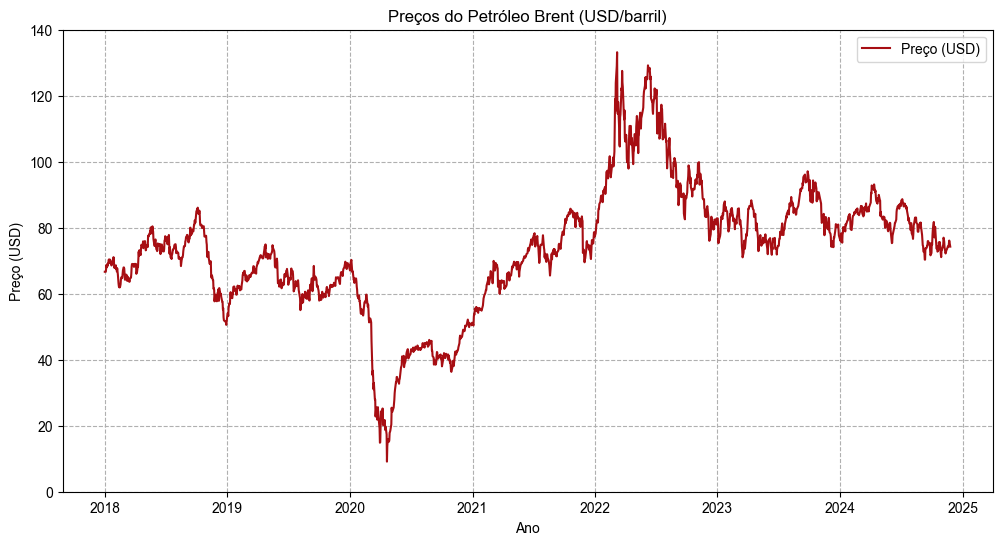

In [12]:
# Configurar dimensão e grid
plt.figure(figsize=(12, 6))
plt.grid(linestyle="--")

# Criar gráfico de linha
sns.lineplot(x="data", y="preco", data=df_brent, color="#A70E13", label="Preço (USD)")
sns.set_style("whitegrid")

# Adicionar título e rótulos
plt.title("Preços do Petróleo Brent (USD/barril)")
plt.xlabel("Ano")
plt.ylabel("Preço (USD)")
plt.ylim(0, 140)

plt.show()

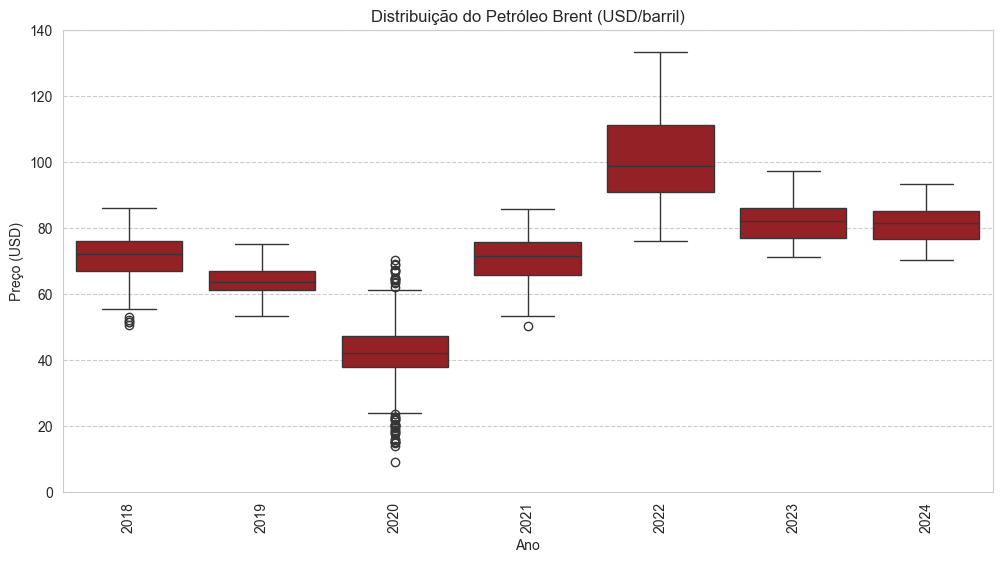

In [13]:
# Configurar dimensão e grid
plt.figure(figsize=(12, 6))
plt.grid(linestyle="--")


# Criar o gráfico de caixa
sns.boxplot(x="ano", y="preco", color="#A70E13", data=df_brent)
sns.set_style("whitegrid")


# Adicionar título e rótulos
plt.title("Distribuição do Petróleo Brent (USD/barril)")
plt.xlabel("Ano")
plt.ylabel("Preço (USD)")
plt.ylim(0, 140)

# Rotacionar a legenda do eixo X para a vertical
plt.xticks(rotation=90)


plt.show()


### 2020: Impactos da Covid-19

No começo de março, mais precisamente em 11/03/2020, a COVID-19 foi classificada pela OMS como pandemia. Naquele momento, houve o reconhecimento de que o surto desta doença estava espalhado por várias regiões no mundo.

Isto acarretou em diversas mudanças abruptas nos mercados globais. Como o petróleo bruto é uma das commodities mais negociadas no mundo, seu preço sofreu uma queda drástica.

Como podemos verificar no segundo gráfico, a média de preço negociada no mês de abr/20 foi de US 18.47. Com uma redução de 74,1% comparado ao mesmo periodo do ano anterior, onde o barril estava com uma média de negóciação de US$ 71,26.

In [14]:
# Filtro do período da Covid
selecao = df_brent['data'].dt.year == 2020

df_brent_2022 = df_brent[selecao]

In [15]:
df_brent_2022.head()

,data,preco,ano,mes
578,2020-01-02,67.05,2020,1
579,2020-01-03,69.08,2020,1
580,2020-01-06,70.25,2020,1
581,2020-01-07,68.74,2020,1
582,2020-01-08,67.31,2020,1


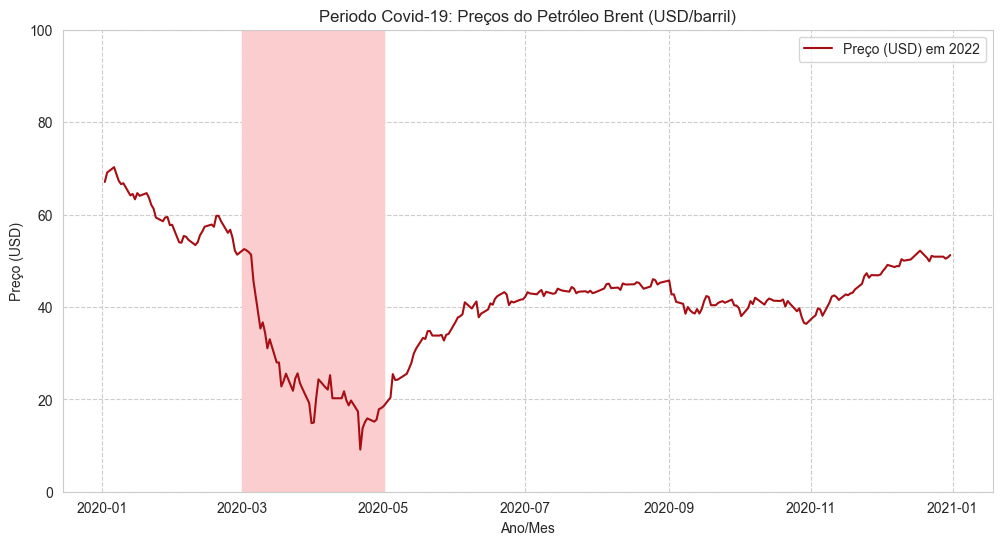

In [16]:
# Configurar dimensão e grid
plt.figure(figsize=(12, 6))
plt.grid(linestyle="--")


# Plotar gráfico de linha
sns.lineplot(x="data", y="preco", data=df_brent_2022, color="#A70E13", label="Preço (USD) em 2022")
sns.set_style("whitegrid")

# Adicionar um vspan para destacar o período de maior queda de preço
plt.axvspan('2020-03-01','2020-05-01', color="#FBCDCE")


# Adicionar título e rótulos
plt.title("Periodo Covid-19: Preços do Petróleo Brent (USD/barril)")
plt.xlabel("Ano/Mes")
plt.ylabel("Preço (USD)")
plt.ylim(0, 100)

plt.show()

In [17]:
# Filtro com 2019 para efeito de comparação
selecao_19_20 = df_brent['data'].dt.year.isin([2019, 2020])

# Aplicar o filtro no DataFrame
df_19_20 = df_brent[selecao_19_20]


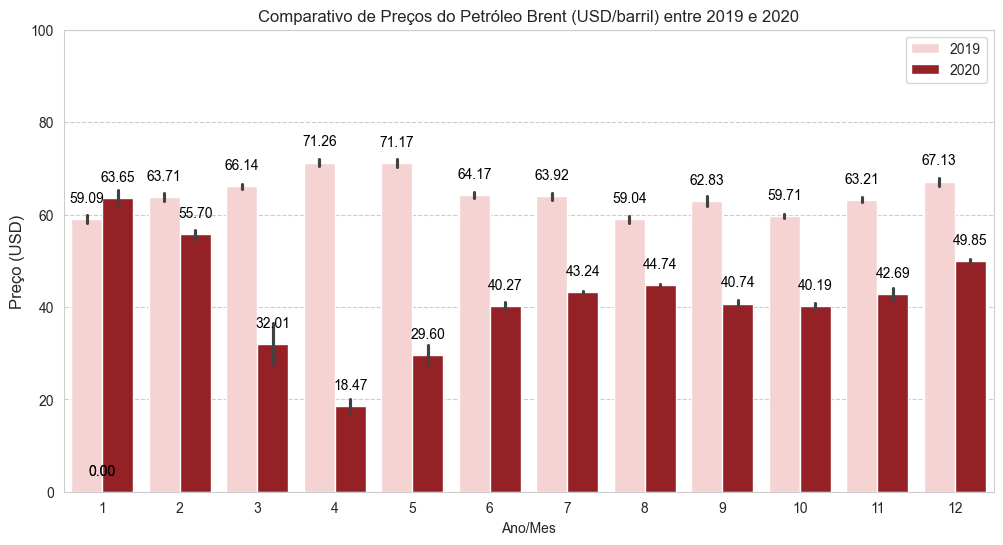

In [18]:
# Criando figura e eixo para o gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))
plt.grid(linestyle="--")

# Definindo a paleta de cores para 2019 e 2020
palette = {2019: '#FBCDCE', 2020: '#A70E13'}

# Criando um grafico de barrar por ano
sns.barplot(x="mes", y="preco", data=df_19_20, hue="ano" , palette=palette, ax=ax)
sns.set_style("whitegrid")

# Adicionando o preço nas barras
for i in ax.patches:
    ax.annotate(f'{i.get_height():.2f}',  # Exibir o preço do petroleo com duas casas decimais
                (i.get_x() + i.get_width() / 2., i.get_height()),  # Posição: meio da barra
                ha='center', va='center',  # Alinhamento do texto
                fontsize=10, color='black',  # Tamanho e cor do texto
                xytext=(0,15),  # Distância do texto da barra
                textcoords='offset points')

# Adicionando as legendas
plt.title("Comparativo de Preços do Petróleo Brent (USD/barril) entre 2019 e 2020", fontsize=12)
plt.xlabel("Ano/Mes", fontsize=10)
plt.ylabel("Preço (USD)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.ylim(0, 100)

plt.show()

## Biblioteca yfinance - Bolsa de Valores

Aquisição dos dados de ações

In [19]:
# Definir intervalo do período a ser analisado

start_date = '2018-01-01'
end_date = '2024-11-25'

In [20]:

def preco_fechamento_yfinance(tickers, start, end):
    '''
        Preços de fechamento de yfinance para uma lista de tickers.

        Parâmetros:
            tickers (dict): dicionário com tickers e nomes
            start (str): data de início
            end (str): data de término

        Retorna:
            df (pd.DataFrame): dataframe com preços de fechamento
    '''
    df = pd.DataFrame()
    for ticker, name in tickers.items():
        try:
            # Baixa o preço de fechamento do ticker no intervalo de datas especificado
            df[name] = yf.download(ticker, start=start, end=end)['Close']
            df.index.name = 'data'  # Nome da coluna do índice como 'data'
        except:
            # Continuar loop
            pass
    
    return df


In [21]:
# Incluir tickers que associam a códigos de ativos financeiros.

tickers_dict = {

    # Índices de Mercado
    "^GSPC": "sp_500",  # 500 grandes empresas dos EUA
    "^IXIC": "nasdaq",   # Ações de tecnologia e crescimento
    "^DJI": "dow_jones", # 30 maiores empresas industriais dos EUA

    # Commodities relacionadas ao petróleo
    "BZ=F": "brent_oil",  # Petróleo Brent
    "CL=F": "wit_oil",    # Petróleo bruto (WTI)
    "NG=F": "gas_natural",# Gás natural

    # Empresas de petróleo e gás
    "PBR": "petrobras", # Petrobras
    "OXY": "petroleo_occidental",  # Occidental Petroleum

    # Empresas de serviços petrolíferos
    "SLB": "schlumberger", # Tecnologia para extração de petróleo
    "HAL": "halliburton",  # Perfuração e extração
    "BKR": "baker_hughes", # Equipamentos de produção de petróleo

    # Empresas de transporte e logística de petróleo
    "KMI": "kinder_morgan",# Transporte e distribuição
}



In [22]:
df_bolsa = preco_fechamento_yfinance(tickers_dict, start=start_date, end=end_date)
df_bolsa.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,sp_500,nasdaq,dow_jones,brent_oil,wit_oil,gas_natural,petrobras,petroleo_occidental,schlumberger,halliburton,baker_hughes,kinder_morgan
data,,,,,,,,,,,,
2018-01-02,2695.810059,7006.899902,24824.009766,66.570000,60.369999,3.056,10.70,73.980003,69.519997,49.610001,32.230000,18.799999
2018-01-03,2713.060059,7065.529785,24922.679688,67.839996,61.630001,3.008,10.97,75.000000,71.330002,50.500000,33.529999,18.959999
2018-01-04,2723.989990,7077.910156,25075.130859,68.070000,62.009998,2.880,11.00,74.959999,73.099998,51.630001,34.630001,19.010000
2018-01-05,2743.149902,7136.560059,25295.869141,67.620003,61.439999,2.795,11.08,74.550003,73.599998,51.820000,34.439999,18.950001
2018-01-08,2747.709961,7157.390137,25283.000000,67.779999,61.730000,2.835,11.22,75.190002,74.800003,52.290001,34.509998,18.860001


In [23]:
# Fim do data frame 
df_bolsa.tail()

,sp_500,nasdaq,dow_jones,brent_oil,wit_oil,gas_natural,petrobras,petroleo_occidental,schlumberger,halliburton,baker_hughes,kinder_morgan
data,,,,,,,,,,,,
2024-11-18,5893.620117,18791.810547,43389.601562,73.300003,69.160004,2.973,14.45,50.910000,43.490002,30.450001,43.070000,27.780001
2024-11-19,5916.979980,18987.470703,43268.941406,73.309998,69.389999,2.998,14.21,50.500000,43.099998,30.469999,42.869999,28.080000
2024-11-20,5917.109863,18966.140625,43408.468750,72.809998,68.870003,3.193,14.28,50.910000,43.529999,31.180000,44.310001,28.000000
2024-11-21,5948.709961,18972.419922,43870.351562,74.230003,70.099998,3.339,14.15,51.540001,44.060001,31.870001,44.880001,28.540001
2024-11-22,5969.339844,19003.650391,44296.511719,75.169998,71.239998,3.129,14.90,51.930000,44.230000,31.940001,44.250000,28.490000


<Figure size 1500x800 with 0 Axes>

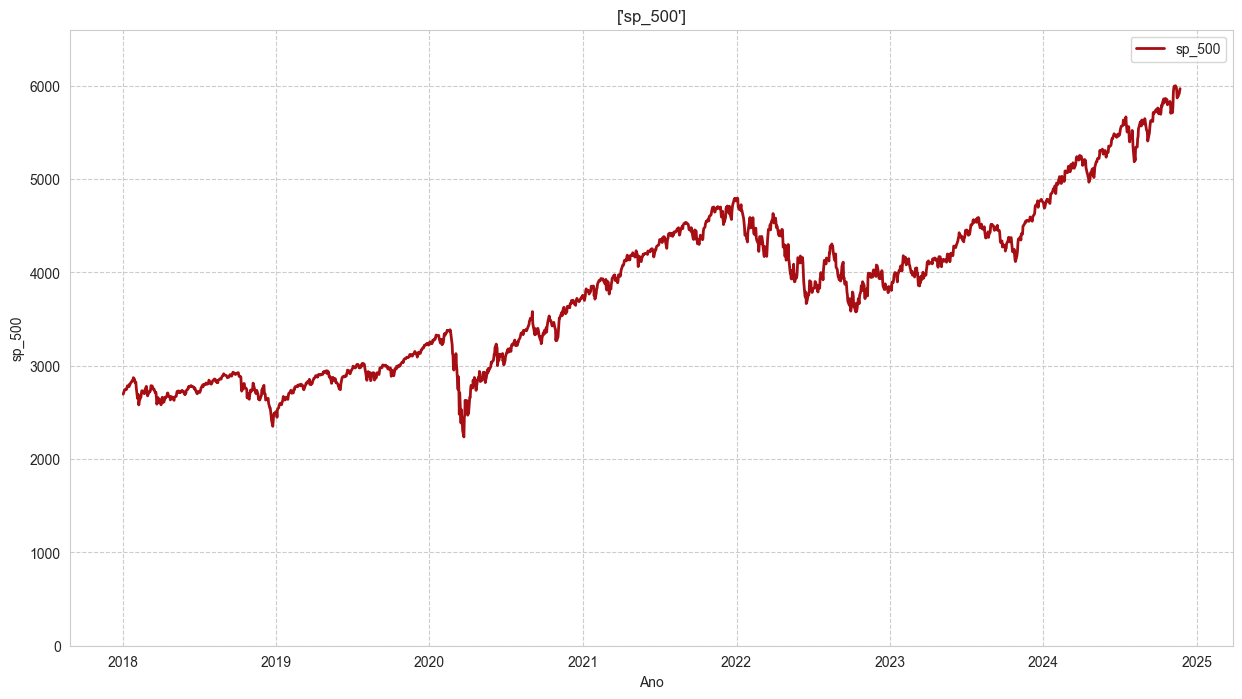

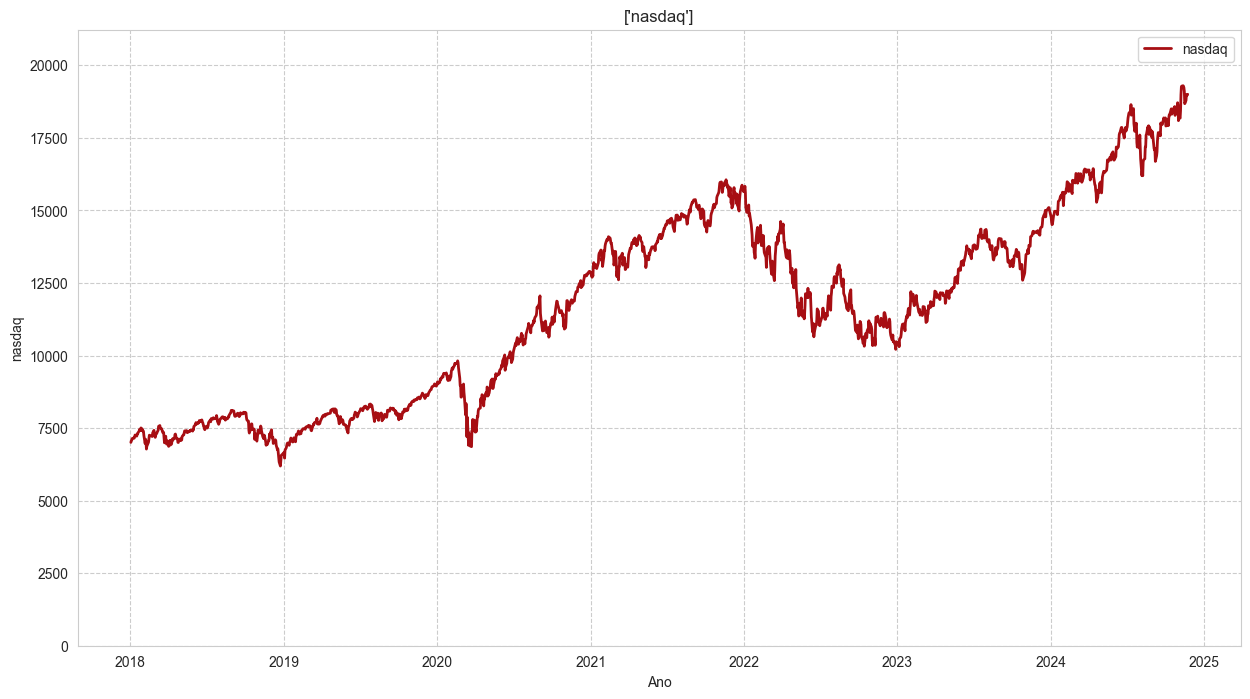

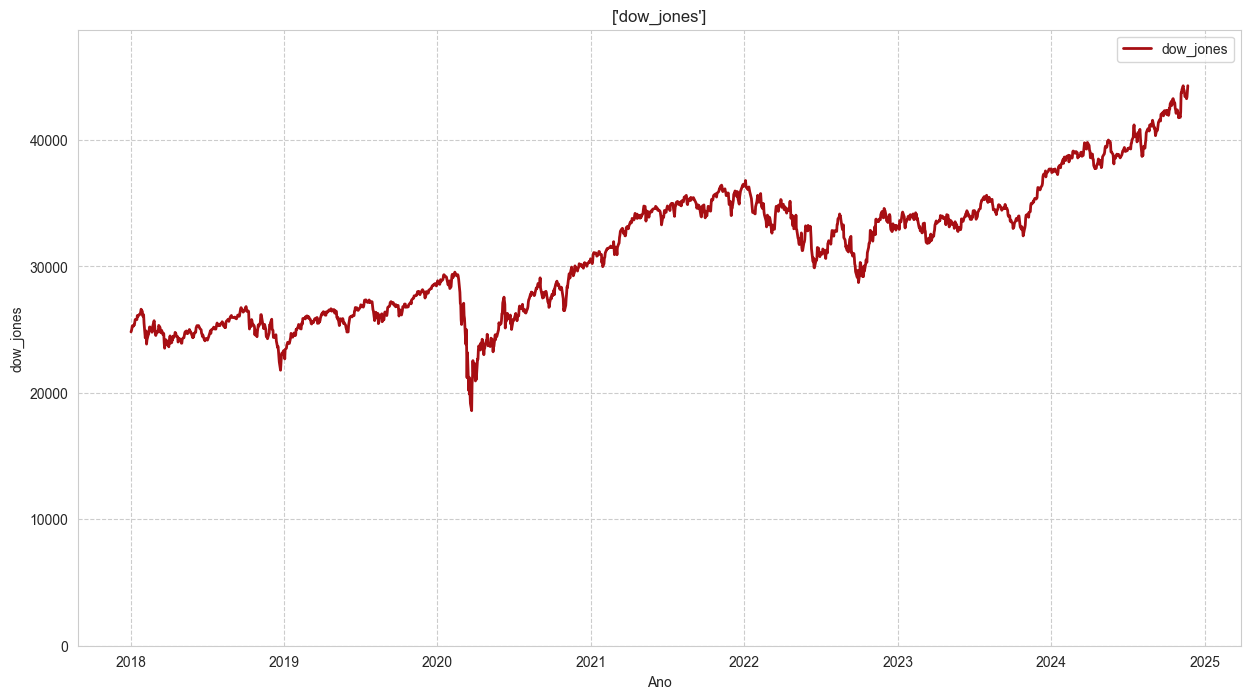

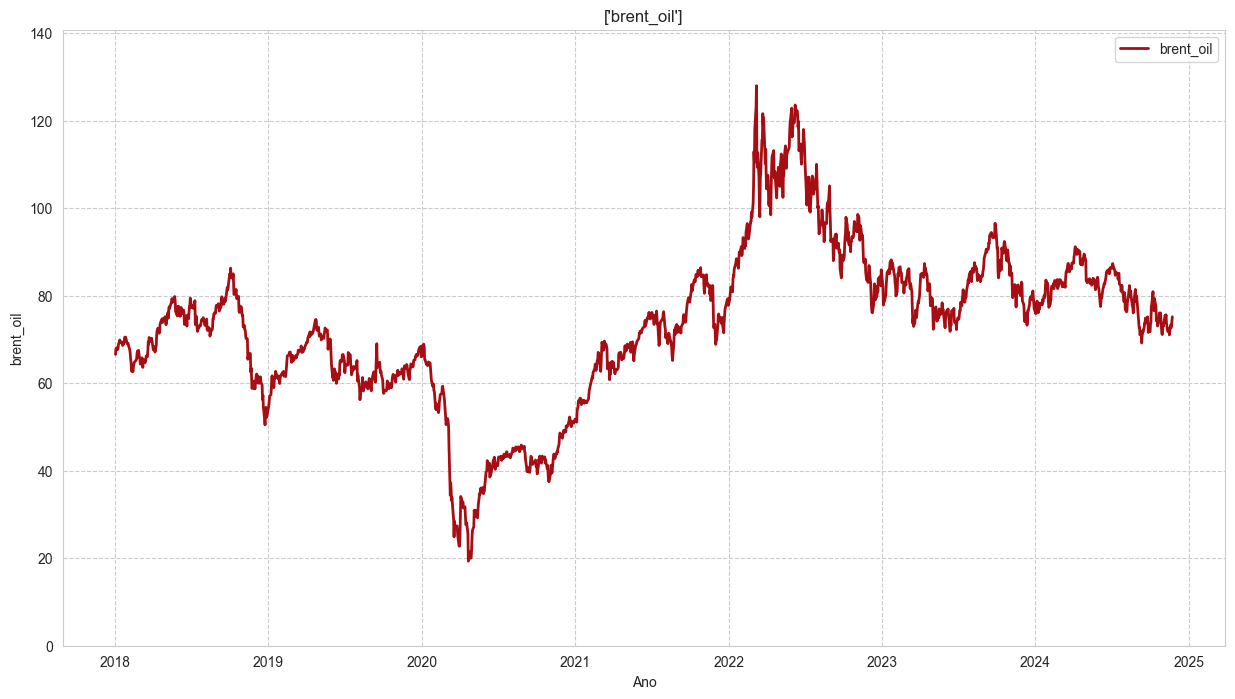

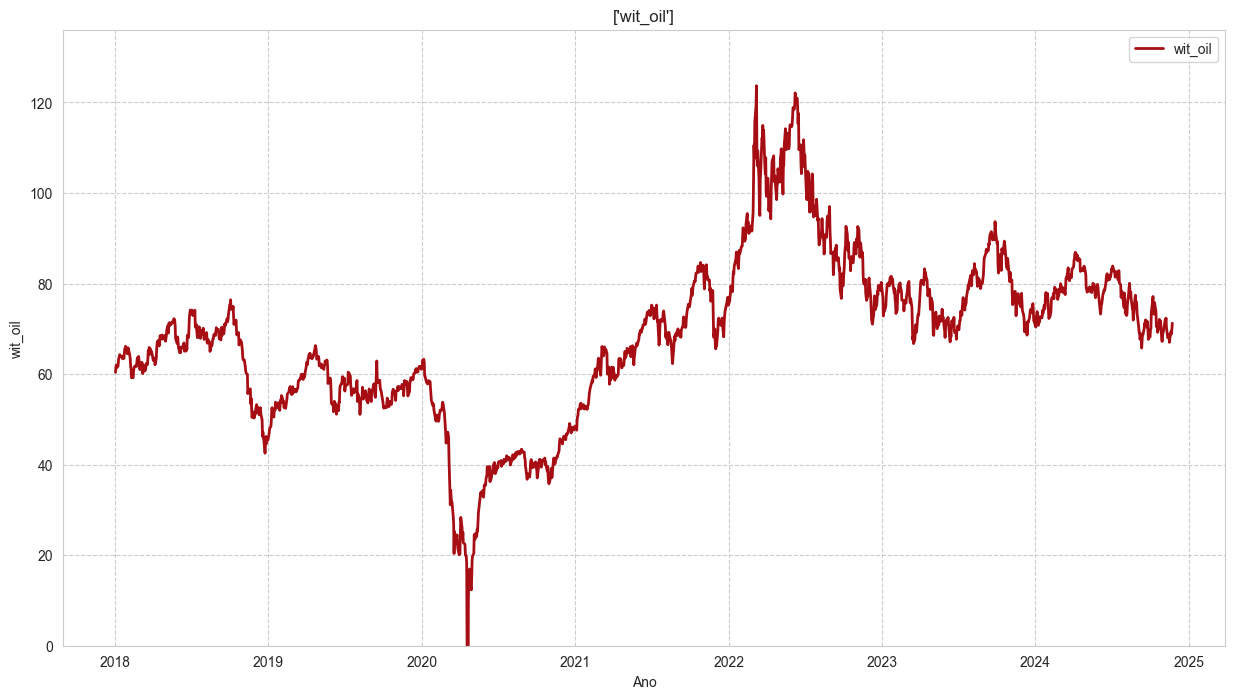

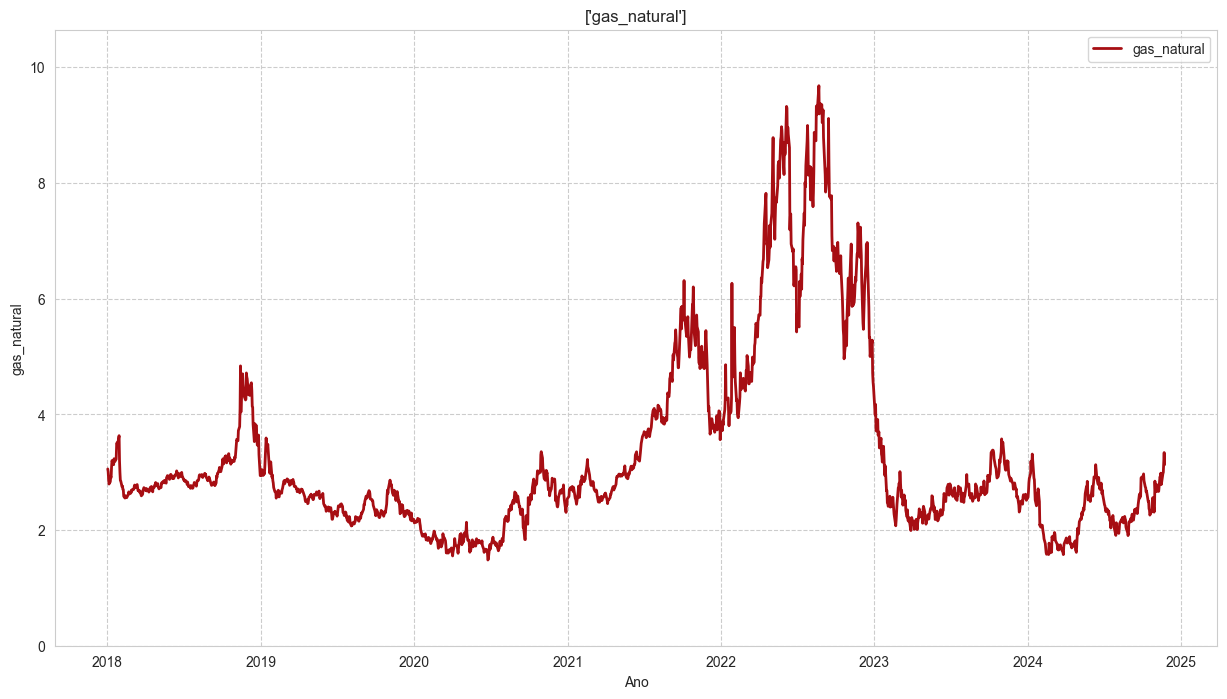

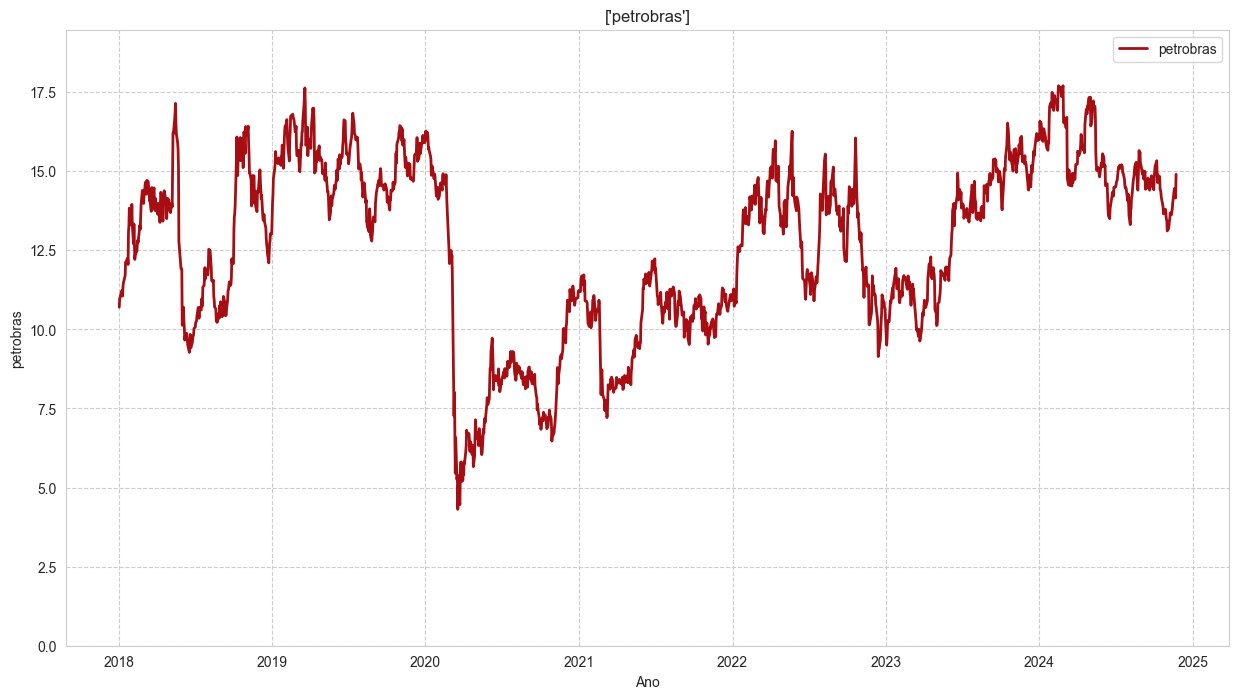

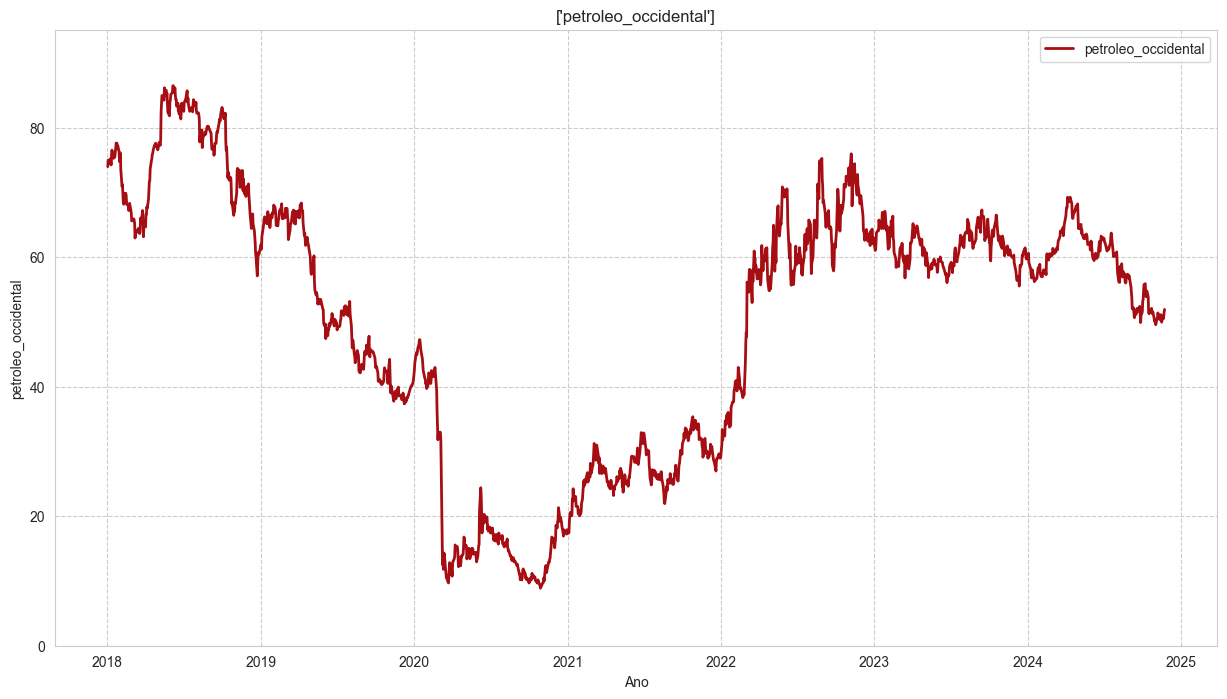

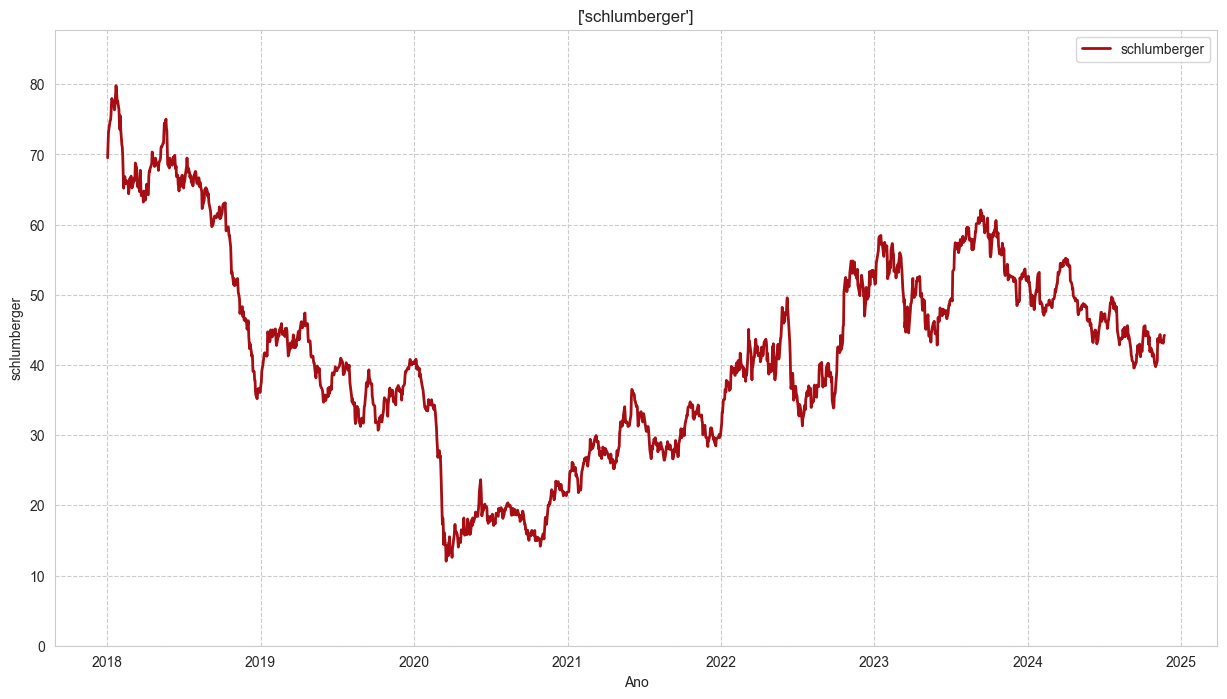

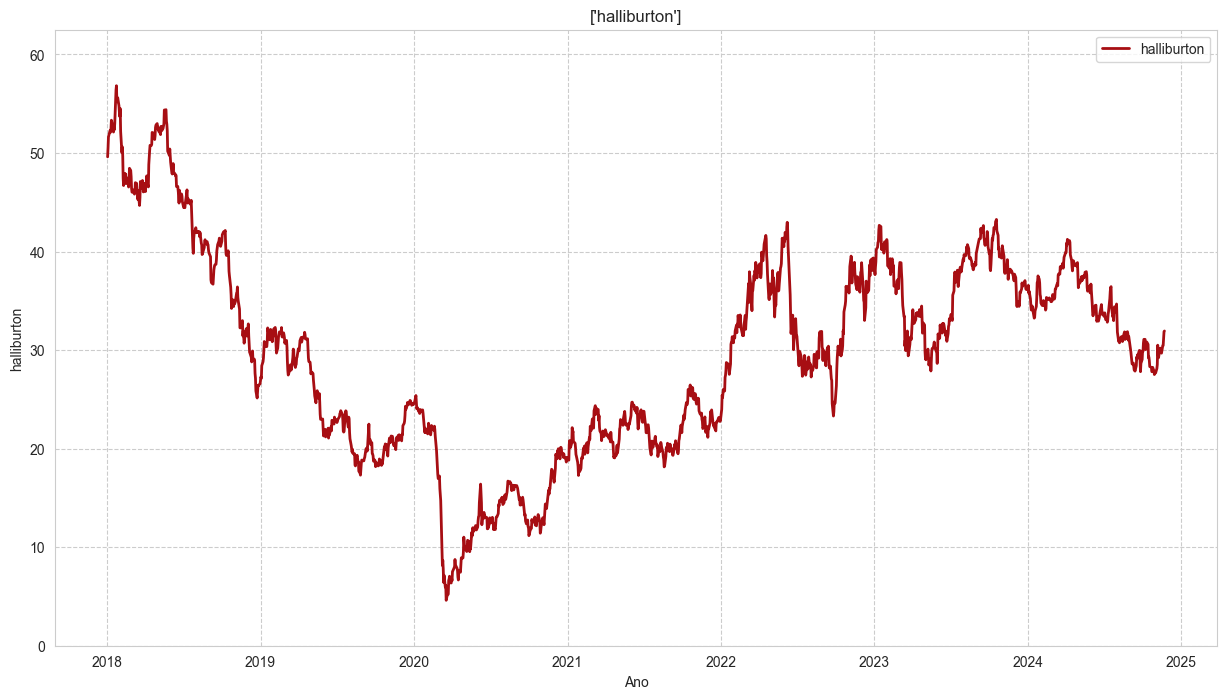

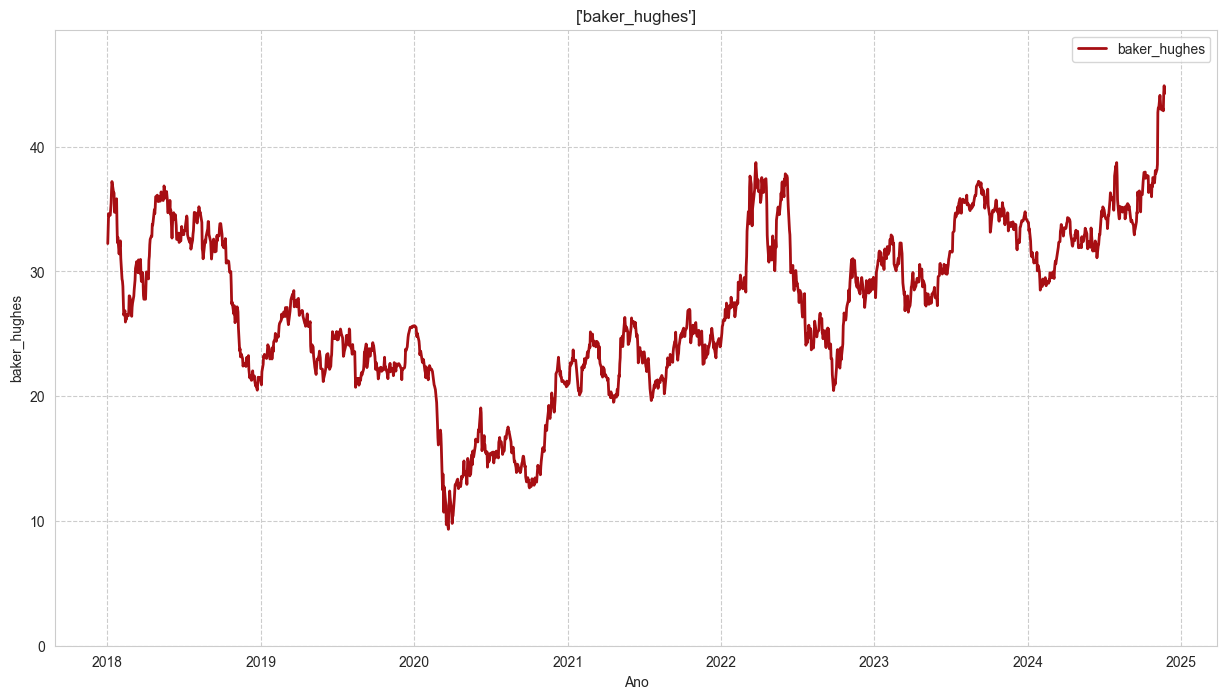

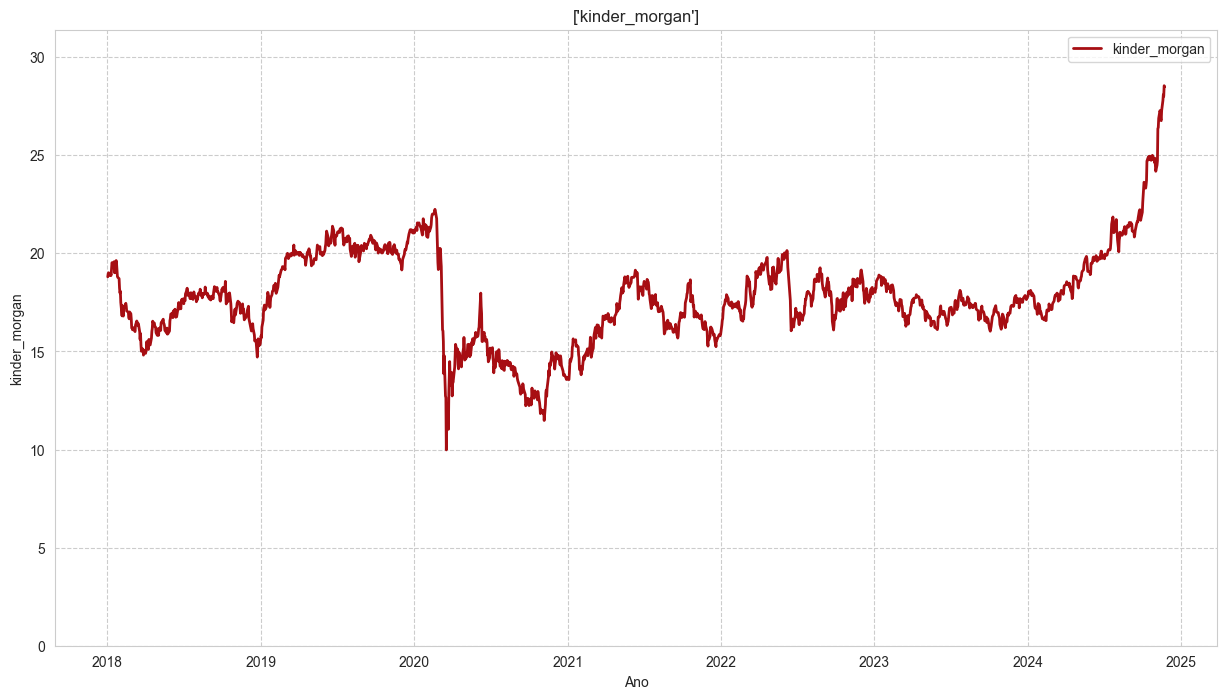

In [24]:
# Configurar a estrutura para gráficos múltiplos
plt.figure(figsize=(15,8))
sns.set_style("whitegrid")

# Plotar cada gráfico separadamente
for ticker, name in tickers_dict.items():
    plt.figure(figsize=(15,8))
    sns.lineplot(x=df_bolsa.index, y=df_bolsa[name], color="#A70E13", label=name, linewidth=2)
   
   
    # Adicionar título e rótulos
    plt.title([name])
    plt.xlabel("Ano")
    plt.grid(linestyle="--")
    plt.ylim(0, df_bolsa[name].max() * 1.1)  # Ajusta o limite superior dinamicamente
    plt.legend([name])
    plt.show()

## Análise de série temporal (Decomposição) 

Durante a análise de uma série temporal, uma das etapas importantes é a decomposição da série. Isso envolve separar e examinar três componentes principais:

- **Tendência:** A direção geral do comportamento dos dados ao longo do tempo.
- **Sazonalidade:** Padrões ou flutuações que se repetem em intervalos regulares.
- **Ruído:** Variações aleatórias ou irregulares que não seguem um padrão claro.

Esses componentes ajudam a entender melhor os fatores que impactam o preço do petróleo Brent e aprimoram a tomada de decisões estratégicas no setor energético e financeiro.

In [25]:
# Se a coluna de datas ainda não for o índice, você pode movê-la para o índice
df_brent = df_bolsa[['brent_oil']]


In [26]:
df_brent.head()

,brent_oil
data,
2018-01-02,66.570000
2018-01-03,67.839996
2018-01-04,68.070000
2018-01-05,67.620003
2018-01-08,67.779999


## Serie Aditiva ou Multiplicativa


A decomposição de uma série temporal é útil para identificar se ela é aditiva ou multiplicativa. Em uma série aditiva, a sazonalidade e a tendência têm magnitudes constantes ao longo do tempo, ou seja, não variam conforme o nível da série. Já em uma série multiplicativa, a magnitude da sazonalidade ou da tendência varia proporcionalmente ao nível da série, ou seja, aumenta ou diminui conforme o valor da série.


- Os dois tipos principais são:

 - Additive -  (modelo apropriado quando a magnitude da sazonalidade não varia com a tendência)
 - Multiplicative -  (modelo é mais apropriado quando a magnitude da sazonalidade varia com a tendência).


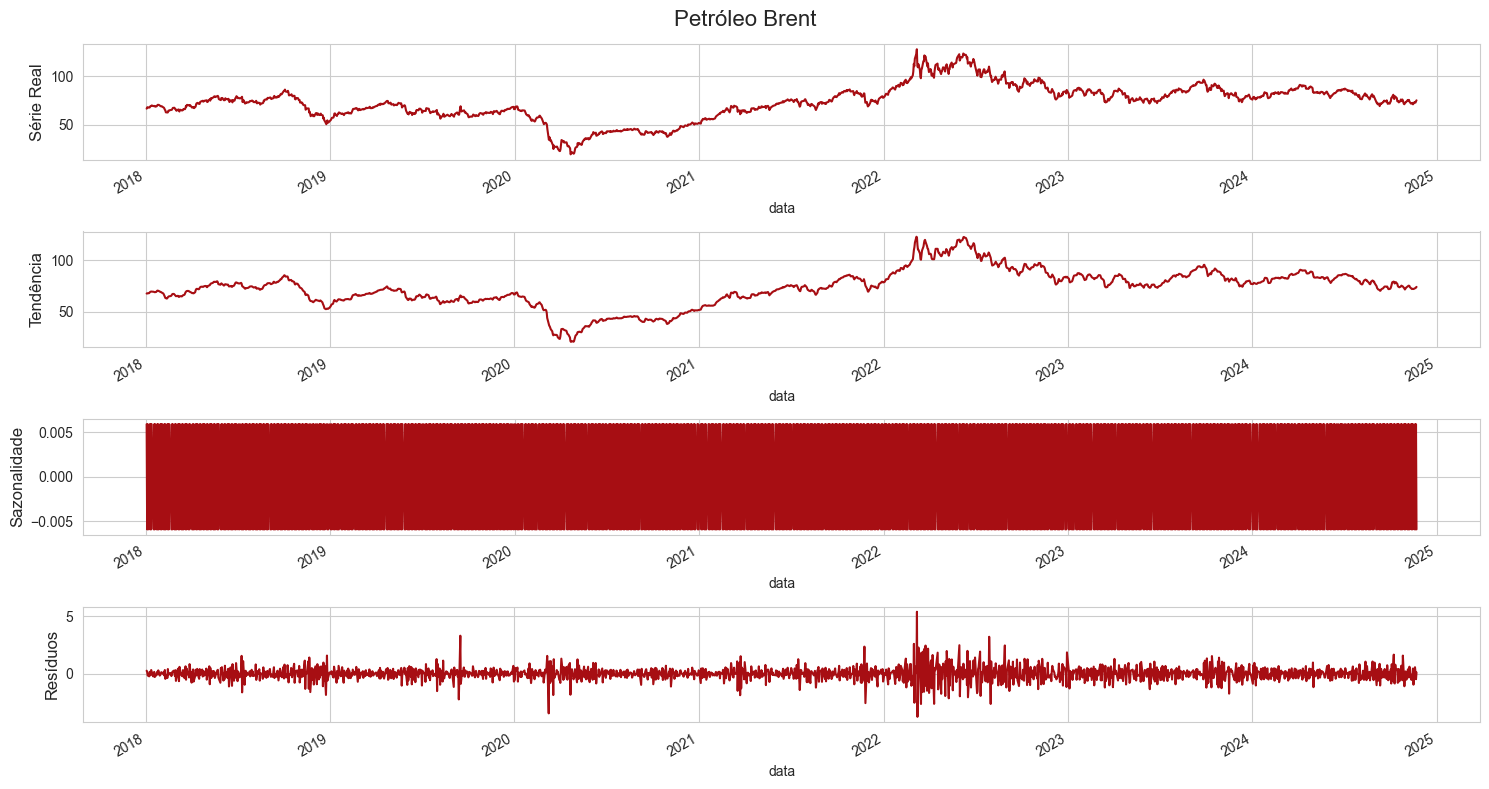

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

seasonplot = seasonal_decompose(df_brent, model='additive', period=2) #decopondo a série temporal
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15,8))
seasonplot.observed.plot(ax=ax1, color="#A70E13")  # Série real
ax1.set_ylabel('Série Real', fontsize=12)

seasonplot.trend.plot(ax=ax2, color="#A70E13")     # Tendência
ax2.set_ylabel('Tendência', fontsize=12)

seasonplot.seasonal.plot(ax=ax3, color="#A70E13")  # Sazonalidade
ax3.set_ylabel('Sazonalidade', fontsize=12)

seasonplot.resid.plot(ax=ax4, color="#A70E13")     # Resíduos
ax4.set_ylabel('Resíduos', fontsize=12)

fig.suptitle('Petróleo Brent', fontsize=16)

plt.tight_layout()
plt.show()



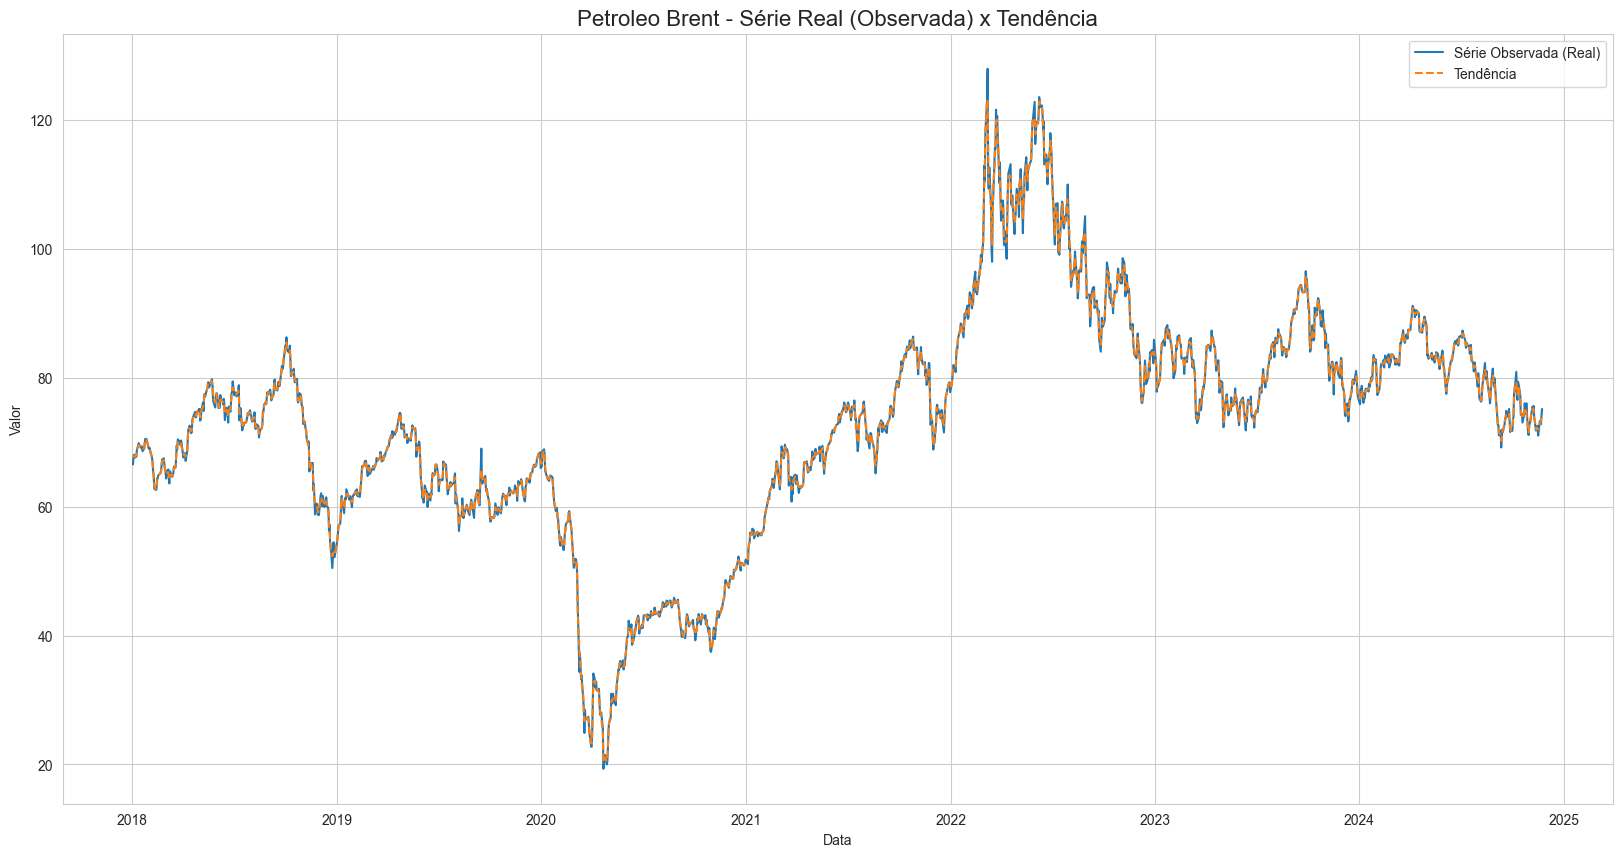

In [28]:
# Criando um gráfico com o valor real x tendência 
fig, ax = plt.subplots(figsize=(20, 10))  # Corrigido para plt.subplots()
ax.plot(seasonplot.observed, label="Série Observada (Real)")
ax.plot(seasonplot.trend, label="Tendência", linestyle='--')

# Adicionando rótulos e título
ax.set_xlabel('Data')
ax.set_ylabel('Valor')
ax.set_title('Petroleo Brent - Série Real (Observada) x Tendência', fontsize=16)
ax.legend()


plt.show()


## Média Móvel

In [29]:
media_movel7d = df_brent['brent_oil'].rolling(7).mean() #média móvel em 7 dias
media_movel14d = df_brent['brent_oil'].rolling(14).mean() #média móvel em 14 dias
media_movel21d = df_brent['brent_oil'].rolling(21).mean() #média móvel em 21 dias


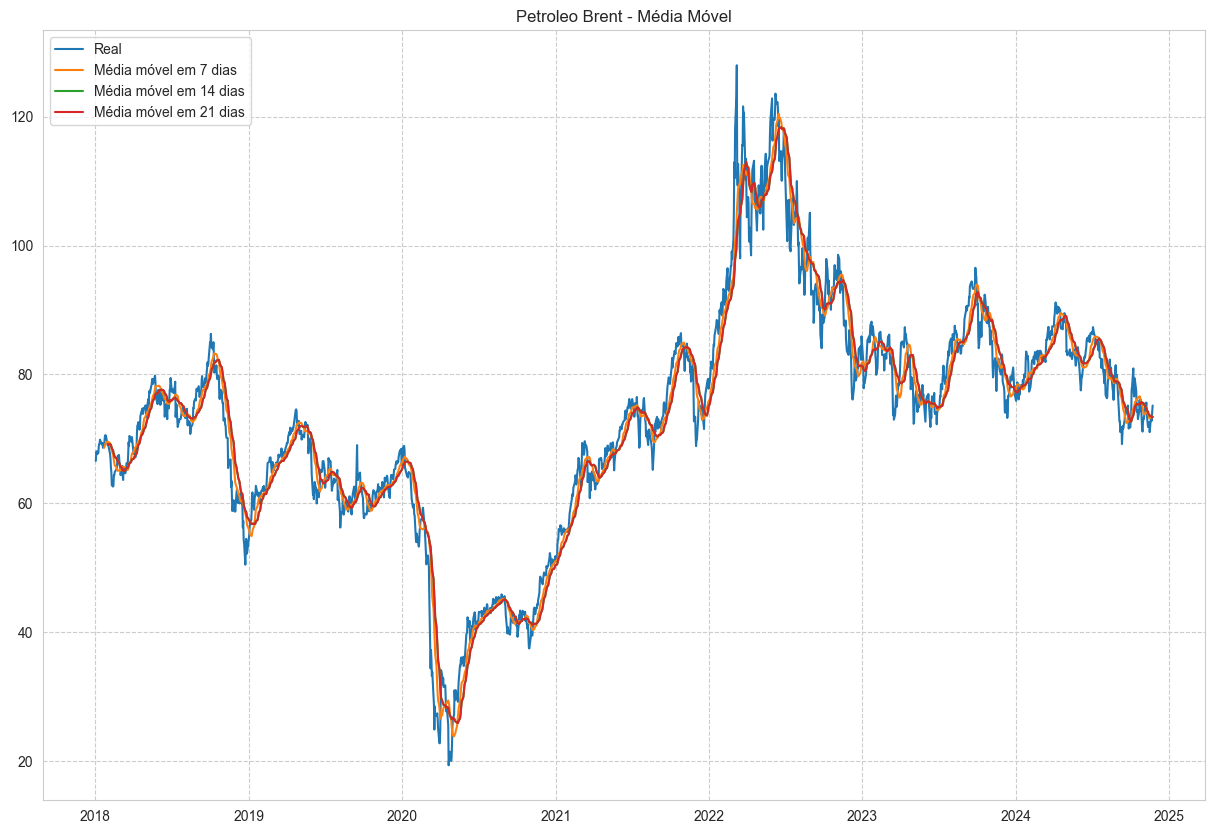

In [30]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df_brent['brent_oil'], label='Real')
plt.plot(media_movel14d, label='Média móvel em 7 dias')
plt.plot(media_movel21d, label='Média móvel em 14 dias')
plt.plot(media_movel21d, label='Média móvel em 21 dias')
plt.legend(loc=2)
plt.title('Petroleo Brent - Média Móvel')
plt.grid(linestyle="--")
plt.show()

## Extração de Features 

Correlação entre o petróleo Brent e outras commodities e ações permite compreender como eventos econômicos globais influenciam seu preço.

**Conclusões referentes ao gráfico de correlação abaixo:**

- Os índices de mercado (sp_500, nasdaq, dow_jones) estão fortemente correlacionados entre si, como esperado.
- brent_oil e wit_oil têm uma correlação extremamente alta, indicando que os preços do petróleo Brent e WTI geralmente se movem juntos.
- gas_natural apresenta menor correlação com outras commodities, sugerindo que seus movimentos de preço não estão tão alinhados com os do petróleo.
- Empresas do setor (schlumberger, halliburton, baker_hughes) apresentam correlação moderada com o brent_oil, refletindo a influência do preço do petróleo em suas operações.

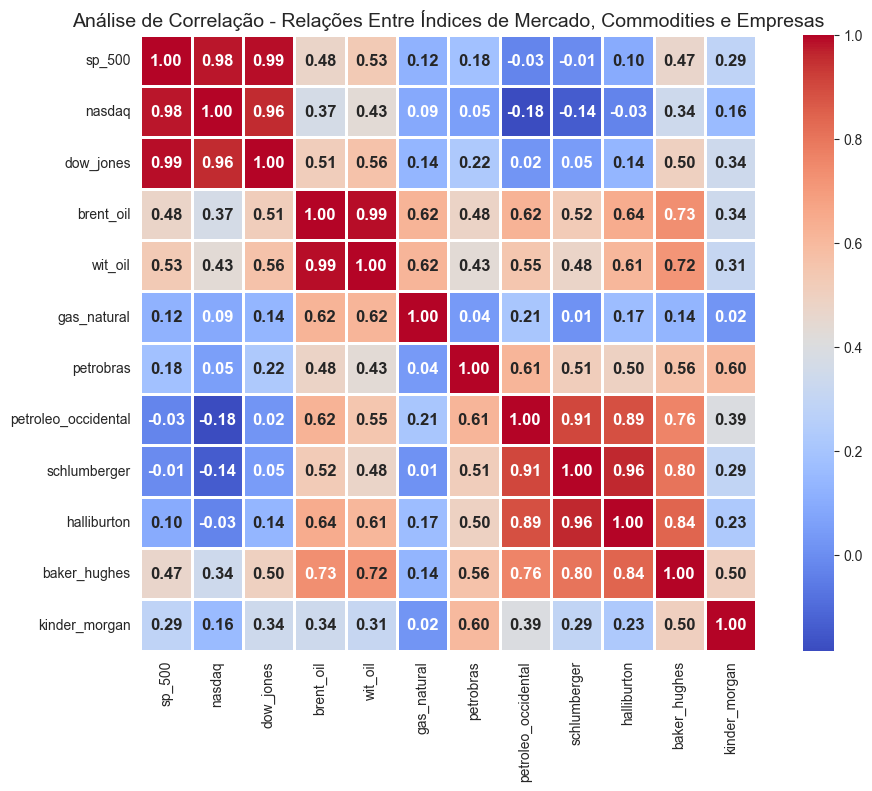

In [ ]:
# Selecionar as colunas relacionadas aos preços de ativos e commodities
coluna_precos = ['sp_500', 'nasdaq', 'dow_jones', 'brent_oil', 'wit_oil', 'gas_natural',
                 'petrobras', 'petroleo_occidental', 'schlumberger', 'halliburton',
                 'baker_hughes', 'kinder_morgan']

# Calcular a matriz de correlação para as colunas selecionadas
corr = df_bolsa[coluna_precos].corr()

# Configurar o gráfico de mapa de calor
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr, ax=ax, cmap='coolwarm',
            annot=True, fmt='.2f',  # Adicionar valores no gráfico com 2 casas decimais
            linewidths=1, square=True,  # Configurar estilo do gráfico
            annot_kws={'weight': 'bold', 'fontsize': 12})  # Personalizar os rótulos

# Adicionar título e subtitulo
ax.set_title('Análise de Correlação - Relações Entre Índices de Mercado, Commodities e Empresas', fontsize=14)


# Exibir o gráfico
plt.show()






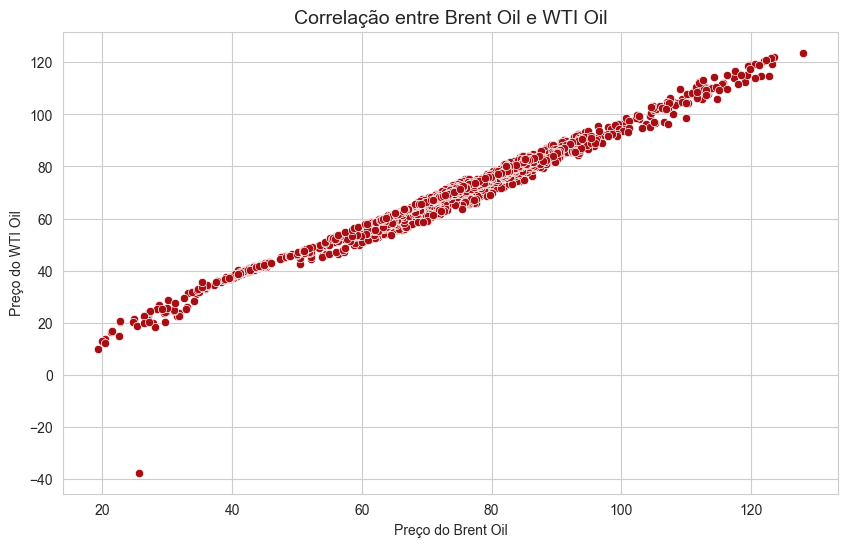

In [38]:
# Relação entre Brent Oil e WTI Oil

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_bolsa['brent_oil'], y=df_bolsa['wit_oil'], color='#A70E13')
plt.title('Correlação entre Brent Oil e WTI Oil', fontsize=14)
plt.xlabel('Preço do Brent Oil')
plt.ylabel('Preço do WTI Oil')
plt.grid(True)
plt.show()

In [39]:
df_bolsa.head()

,sp_500,nasdaq,dow_jones,brent_oil,wit_oil,gas_natural,petrobras,petroleo_occidental,schlumberger,halliburton,baker_hughes,kinder_morgan
data,,,,,,,,,,,,
2018-01-02,2695.810059,7006.899902,24824.009766,66.570000,60.369999,3.056,10.70,73.980003,69.519997,49.610001,32.230000,18.799999
2018-01-03,2713.060059,7065.529785,24922.679688,67.839996,61.630001,3.008,10.97,75.000000,71.330002,50.500000,33.529999,18.959999
2018-01-04,2723.989990,7077.910156,25075.130859,68.070000,62.009998,2.880,11.00,74.959999,73.099998,51.630001,34.630001,19.010000
2018-01-05,2743.149902,7136.560059,25295.869141,67.620003,61.439999,2.795,11.08,74.550003,73.599998,51.820000,34.439999,18.950001
2018-01-08,2747.709961,7157.390137,25283.000000,67.779999,61.730000,2.835,11.22,75.190002,74.800003,52.290001,34.509998,18.860001


In [ ]:
# Selecionar as colunas relacionadas aos preços de ativos e commodities, mantendo as mais correlacionadas
coluna_precos_relevantes = ['sp_500', 'nasdaq', 'dow_jones', 'brent_oil', 'wit_oil',
                            'petrobras', 'petroleo_occidental', 'schlumberger', 
                            'halliburton', 'baker_hughes']

# Calcular a rentabilidade diária para cada ação/índice (usando variação percentual)
df_rentabilidade = df_bolsa[coluna_precos_relevantes].pct_change() * 100  # Rentabilidade em %


df_rentabilidade.head()


,sp_500,nasdaq,dow_jones,brent_oil,wit_oil,petrobras,petroleo_occidental,schlumberger,halliburton,baker_hughes
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.639882,0.836745,0.397478,1.907761,2.087133,2.523369,1.378746,2.603575,1.793992,4.033507
2,0.402864,0.175222,0.611697,0.339038,0.616578,0.273471,-0.053335,2.481420,2.237626,3.280651
3,0.703377,0.828633,0.880308,-0.661080,-0.919206,0.727272,-0.546953,0.683995,0.368000,-0.548664
4,0.166234,0.291878,-0.050874,0.236611,0.472007,1.263541,0.858483,1.630441,0.906988,0.203251


Correlação por rentabilidade

In [66]:
df_rentabilidade.corr()

,sp_500,nasdaq,dow_jones,brent_oil,wit_oil,petrobras,petroleo_occidental,schlumberger,halliburton,baker_hughes
sp_500,1.000000,0.948156,0.952464,0.261359,0.134226,0.458614,0.458133,0.504587,0.534851,0.530874
nasdaq,0.948156,1.000000,0.833112,0.207268,0.103482,0.377440,0.353174,0.381343,0.414516,0.413256
dow_jones,0.952464,0.833112,1.000000,0.283901,0.150923,0.496803,0.500665,0.563638,0.592022,0.583259
brent_oil,0.261359,0.207268,0.283901,1.000000,0.464792,0.403142,0.528231,0.539515,0.565706,0.441376
wit_oil,0.134226,0.103482,0.150923,0.464792,1.000000,0.162637,0.223873,0.193813,0.197602,0.153177
petrobras,0.458614,0.377440,0.496803,0.403142,0.162637,1.000000,0.527086,0.550598,0.570380,0.512102
petroleo_occidental,0.458133,0.353174,0.500665,0.528231,0.223873,0.527086,1.000000,0.708985,0.741328,0.643772
schlumberger,0.504587,0.381343,0.563638,0.539515,0.193813,0.550598,0.708985,1.000000,0.868446,0.772932
halliburton,0.534851,0.414516,0.592022,0.565706,0.197602,0.570380,0.741328,0.868446,1.000000,0.760603
baker_hughes,0.530874,0.413256,0.583259,0.441376,0.153177,0.512102,0.643772,0.772932,0.760603,1.000000


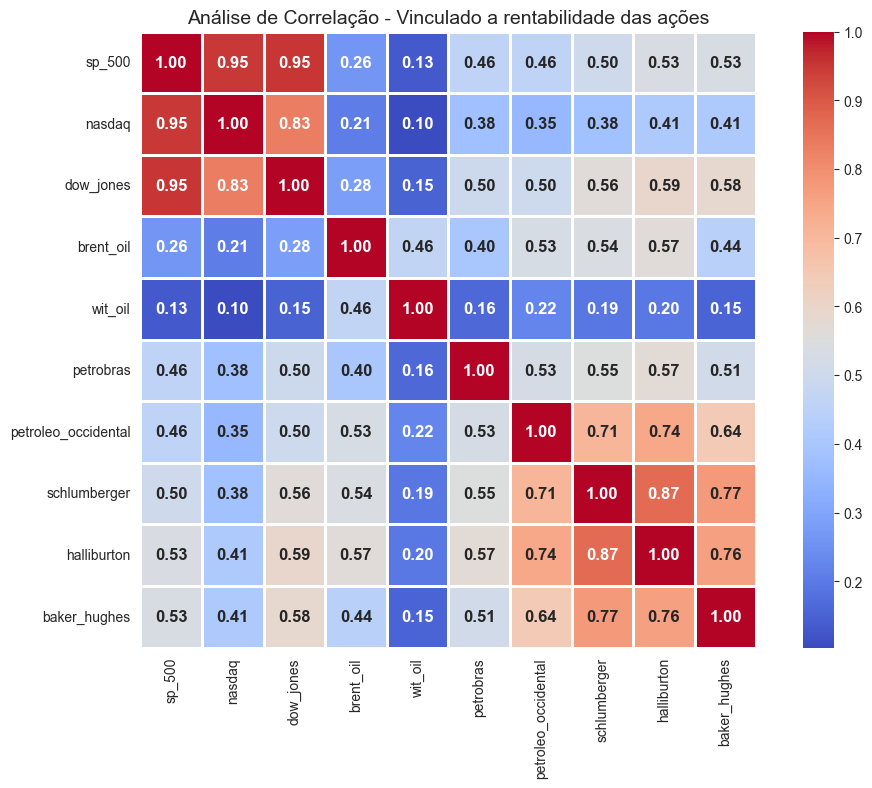

In [69]:

coluna_precos_relevantes = ['sp_500', 'nasdaq', 'dow_jones', 'brent_oil', 'wit_oil',
                            'petrobras', 'petroleo_occidental', 'schlumberger', 
                            'halliburton', 'baker_hughes']

# Calcular a rentabilidade diária para cada ação/índice (usando variação percentual)
df_rentabilidade = df_bolsa[coluna_precos_relevantes].pct_change() * 100  # Rentabilidade em %

# Calcular a matriz de correlação para as rentabilidades
corr = df_rentabilidade.corr()

# Configurar o gráfico de mapa de calor
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr, ax=ax, cmap='coolwarm',
            annot=True, fmt='.2f',  # Adicionar valores no gráfico com 2 casas decimais
            linewidths=1, square=True,  # Configurar estilo do gráfico
            annot_kws={'weight': 'bold', 'fontsize': 12})  # Personalizar os rótulos

# Adicionar título e subtítulo
ax.set_title('Análise de Correlação - Vinculado a rentabilidade das ações', fontsize=14)

# Exibir o gráfico
plt.show()
